GRIP TASK-2:Colour identification in images
By Hruthik Arroju

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, deltaE_cie76

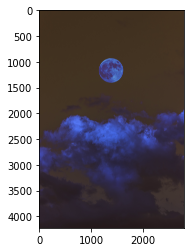

In [2]:
image = cv2.imread('altinay-dinc-LluELtL5mK4-unsplash.jpg')
plt.imshow(image)
plt.show()

In [3]:
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))

The type of this input is <class 'numpy.ndarray'>
Shape: (4221, 2814, 3)


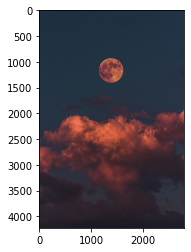

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

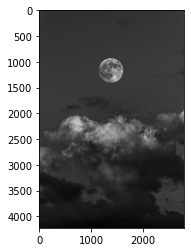

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()


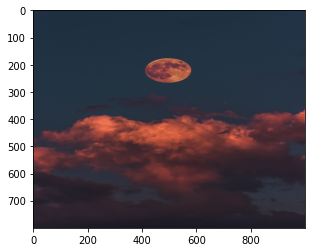

In [6]:
resized_image = cv2.resize(image, (1000, 800))
plt.imshow(resized_image)
plt.show()

In [7]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


def get_colors(image, number_of_colors, show_chart): 
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([92.58300188, 48.20975508, 52.50143047]),
 array([34.73899927, 50.55444423, 66.49041937]),
 array([159.95488224,  73.16353533,  61.52460969]),
 array([49.23967465, 47.40831451, 59.87844555]),
 array([201.71452817,  95.87033265,  68.79293958]),
 array([41.08797454, 33.25404534, 42.96311145]),
 array([68.75872093, 41.63131516, 48.32427827]),
 array([122.12736388,  57.8527575 ,  57.59310405])]

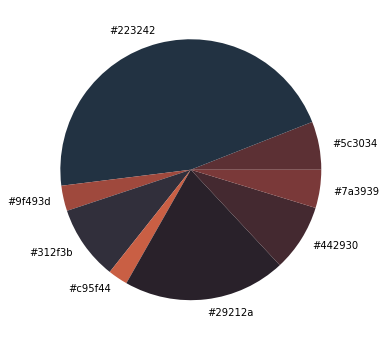

In [9]:
get_colors(get_image('altinay-dinc-LluELtL5mK4-unsplash.jpg'), 8, True)

In [38]:
IMAGE_DIRECTORY = 'images'

COLORS = {'RED':[255,0,0],'GREEN': [0, 128, 0],'MIDNIGHTBLUE': [25,25,112],'YELLOW': [255, 255, 0]}

images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

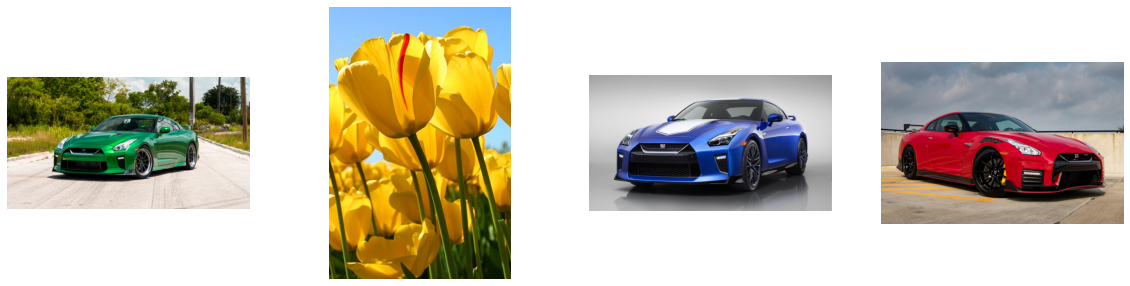

In [25]:
plt.figure(figsize=(20, 5))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
    plt.axis('off')

In [26]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    
    for i in range(number_of_colors):
        
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        
        if (diff < threshold):
            select_image = True
    
    return select_image

In [27]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            plt.axis('off')
            index += 1

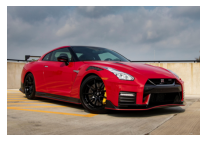

In [14]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)

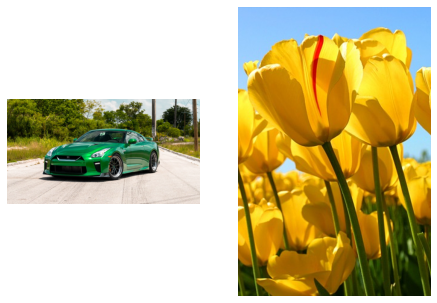

In [28]:
plt.figure(figsize = (20, 8))
show_selected_images(images, COLORS['GREEN'], 60, 5)

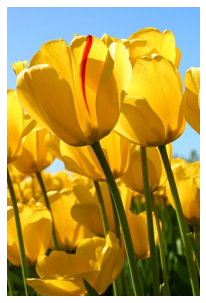

In [29]:
plt.figure(figsize = (20, 8))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

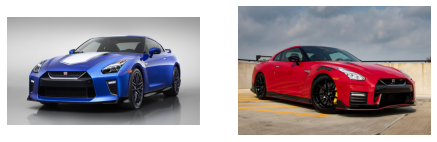

In [39]:
plt.figure(figsize = (20, 8))
show_selected_images(images, COLORS['MIDNIGHTBLUE'], 60, 5)